# Business Understanding

What determines a house price?

Our project aims to provide a consultation for real estate angencies that help homeowners sell homes. We will develop a pricing algorithm to help set a price for a home by predicting home prices. 

First, our pricing model will show the relationships between the attributes of a house and its price. Then, we address the key attributes that determine the house price. 


This project uses the King County House Sales dataset, which contains 21597 home sales records in 2014-2015, including attributes of houses as well as their prices. 


### Loading the Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats  
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error, r2_score , make_scorer
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.dummy import DummyRegressor

In [2]:
data = pd.read_csv("data/kc_house_data.csv",index_col='id')

# Data Understanding

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#suggestion for the project to save time
irrelevant_columns = ['date',
'view',
'sqft_above',
'sqft_basement',
'yr_renovated',
'lat',
'long',
'sqft_living15',
'sqft_lot15']

In [5]:
df=data.drop(irrelevant_columns, axis=1).copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 2.0 MB


In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,98199.000000


In [8]:
df.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
dtype: int64

In [9]:
for col in df.columns:
    try:
        print(col, df[col].value_counts())
    except:
        print(col, df[col].value_counts())   
    print('\n')

price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
285750.0      1
162950.0      1
612995.0      1
255544.0      1
897000.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1010    129
1660    129
       ... 
2678      1
6900      1
6980      1
3078      1
2031      1
Name: sqft_living, Length: 1034, dtype: i

In [10]:
print('bedrooms', set(df['bedrooms']))

bedrooms {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33}


In [11]:
#typo or outlier, need to drop 
df.loc[df['bedrooms']==33,['bathrooms']]

,bathrooms
id,
2402100895,1.75


In [12]:
df=df.drop(df[df['bedrooms']==33].index).copy()

In [13]:
for col in df.columns:
    try:
        print(col, df[col].nunique())
    except:
        print(col, df[col].nunique())   
    print('\n')

price 3622


bedrooms 11


bathrooms 29


sqft_living 1034


sqft_lot 9776


floors 6


waterfront 2


condition 5


grade 11


yr_built 116


zipcode 70




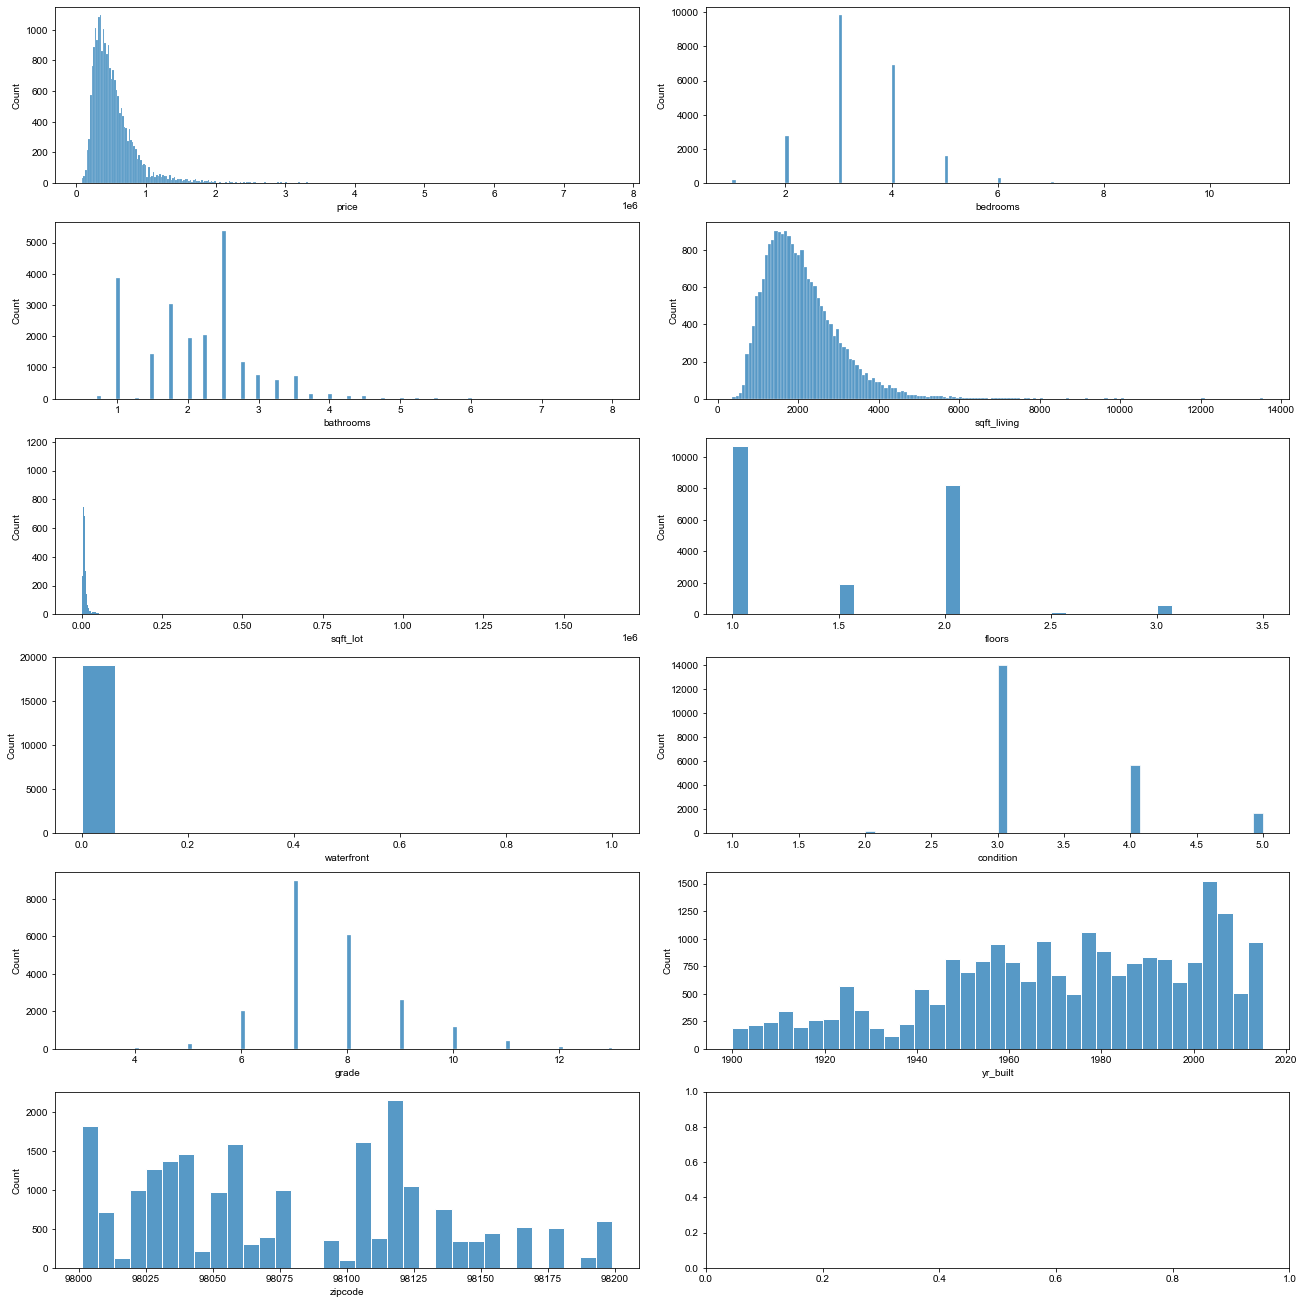

In [14]:
f, axes = plt.subplots(nrows=6, ncols=2, figsize=(18,18) ,constrained_layout=True)

for axx, column in zip(axes.flatten(), df.columns):
    sns.set_style("white")
    sns.histplot(x=df[column], data=df,ax=axx)
   

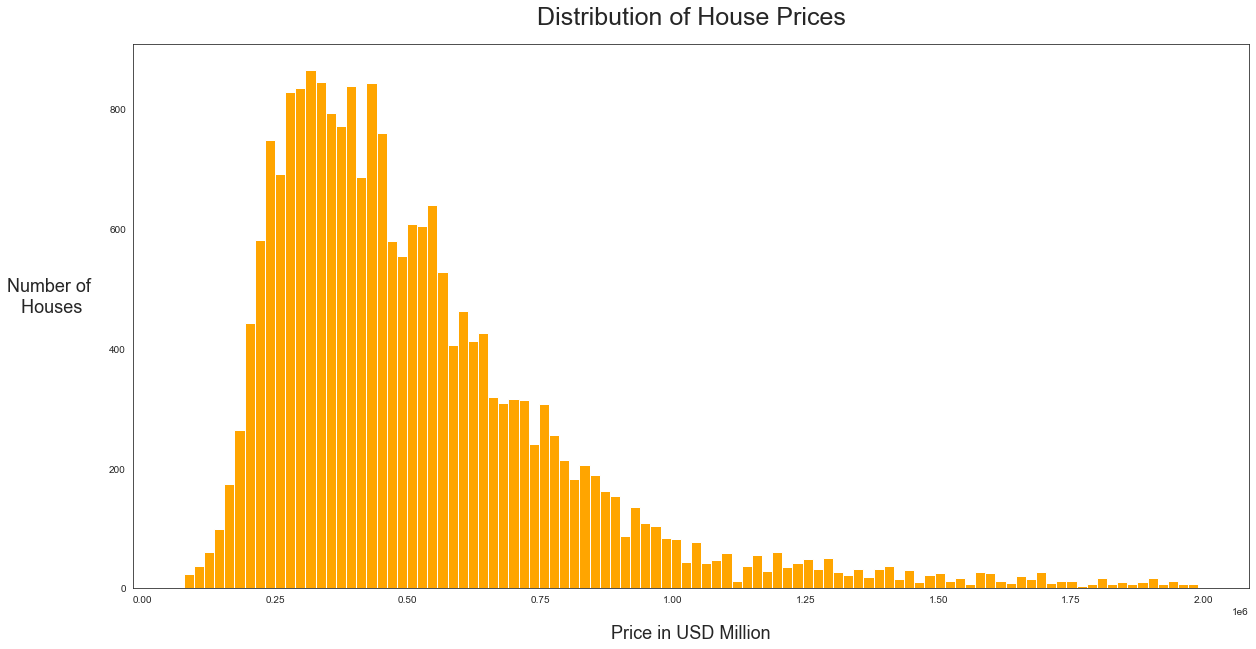

In [15]:
price_plot = data.loc[data['price']<2000000]
sns.set_style("white")
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(price_plot['price'], bins=100, color='orange')
ax.set_xlabel("Price in USD Million", fontsize=18, labelpad=20)
ax.set_ylabel("Number of\n Houses", fontsize=18, labelpad=60, rotation=0)
ax.set_title("Distribution of House Prices", fontsize=25, pad=20);

#plt.savefig('price.png', dpi=100, bbox_inches='tight')

In [16]:
#checking for outliers 
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))

0.9 percentile: 887000.0
0.91 percentile: 919994.5
0.92 percentile: 950000.0
0.93 percentile: 997967.5000000001
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0


In [17]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['sqft_living'].quantile(q=q)))

0.9 percentile: 3255.0
0.91 percentile: 3340.0
0.92 percentile: 3420.0
0.93 percentile: 3510.0
0.94 percentile: 3630.0
0.95 percentile: 3760.0
0.96 percentile: 3920.0
0.97 percentile: 4140.0
0.98 percentile: 4410.0


In [18]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['sqft_lot'].quantile(q=q)))

0.9 percentile: 21372.0
0.91 percentile: 24151.70000000002
0.92 percentile: 28506.400000000023
0.93 percentile: 34848.0
0.94 percentile: 37643.5
0.95 percentile: 43308.75
0.96 percentile: 50655.600000000006
0.97 percentile: 67384.89999999976
0.98 percentile: 107157.0


In [19]:
stats.kurtosis(df.sqft_living)

5.250278624437211

In [20]:
stats.skew(df.sqft_living)

1.4730409364724821

In [21]:
stats.skew(df.sqft_lot)

13.071406775919803

> A high positive skewness is observed as there are more values on the left side of the 
distribution mean <br /> than those on right side, longer tail to the right side 

In [22]:
stats.kurtosis(df.sqft_lot)

285.4168446506654

> kurtosis higher than 3 indicates heavier tails than a normal distribution

In [23]:
loglot= np.log(df.sqft_lot)

In [24]:
stats.kurtosis(loglot)

3.3286839377382753

In [25]:
stats.skew(loglot)

0.9623750156615982

> will need to log transform later

In [26]:
logliv= np.log(df.sqft_living)

In [27]:
stats.kurtosis(logliv)

-0.0793932778715023

In [28]:
stats.skew(logliv)

-0.027409771717033345

> better without log transfomation 

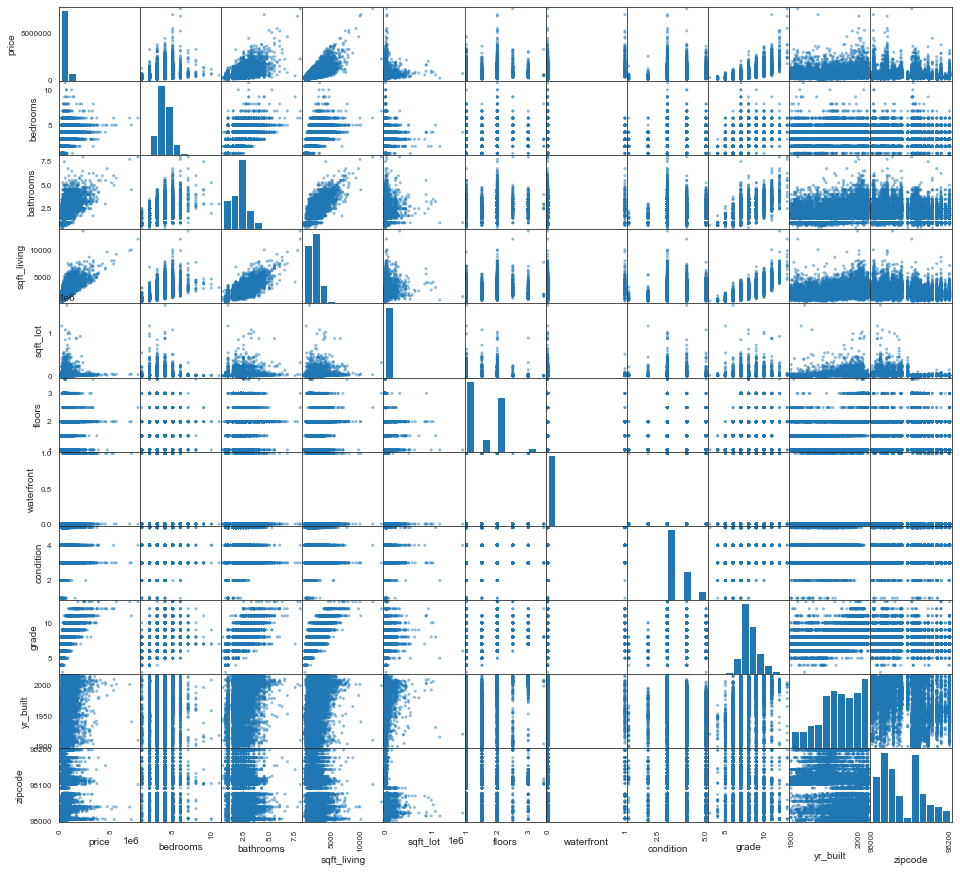

In [29]:
pd.plotting.scatter_matrix(df,figsize  = [16, 15]);

<AxesSubplot:>

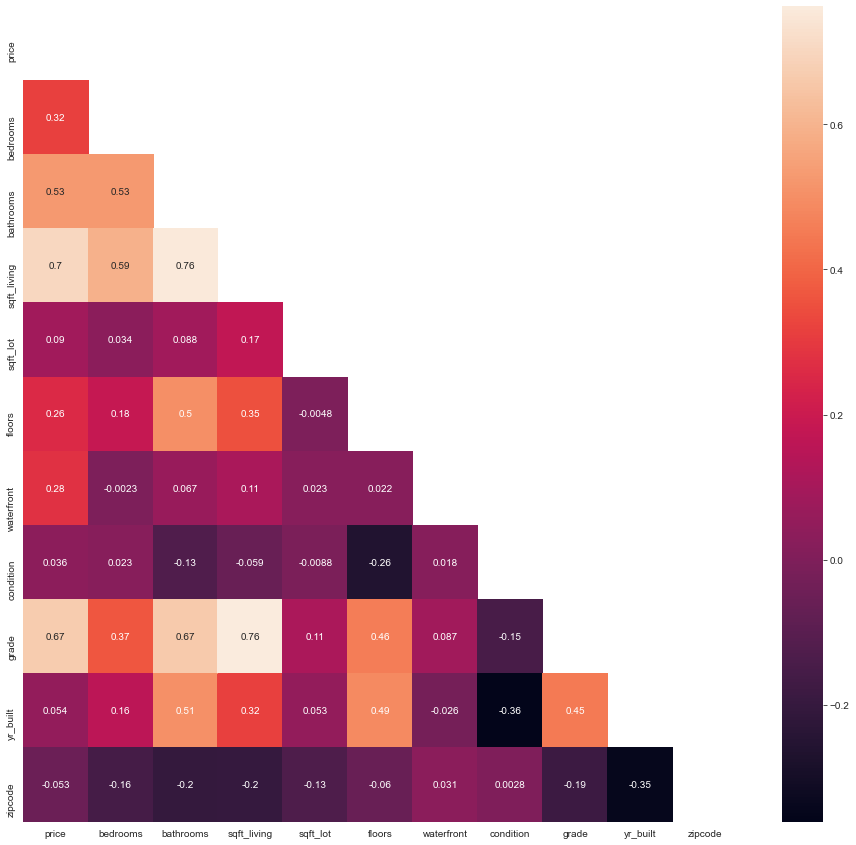

In [30]:
#checking for correlation and considering multicollinearity 
corr= df.corr()
fig, axes = plt.subplots( figsize=(16,15))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype = bool)), annot=True)

> Based on the plot above, 'sqft_living' is most strongly correlated with the target (`price`).

In [31]:
print(abs(corr) > 0.60)

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price         True     False      False         True     False   False   
bedrooms     False      True      False        False     False   False   
bathrooms    False     False       True         True     False   False   
sqft_living   True     False       True         True     False   False   
sqft_lot     False     False      False        False      True   False   
floors       False     False      False        False     False    True   
waterfront   False     False      False        False     False   False   
condition    False     False      False        False     False   False   
grade         True     False       True         True     False   False   
yr_built     False     False      False        False     False   False   
zipcode      False     False      False        False     False   False   

             waterfront  condition  grade  yr_built  zipcode  
price             False      False   True     Fa

> Note
> - price is highly correlated with sqft_living and grade
> - bathrooms is also correlated with sqft_living and grade  


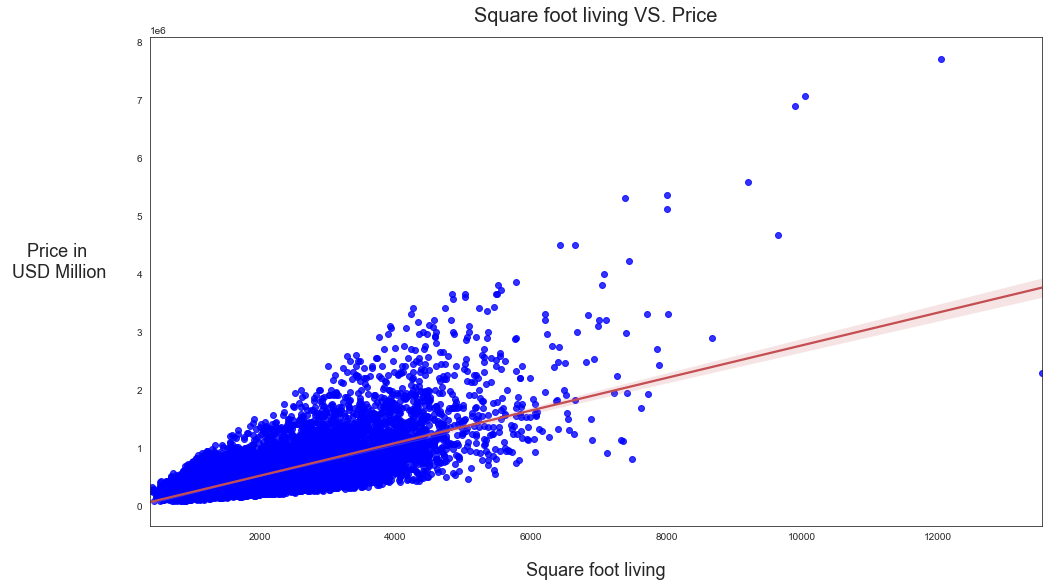

In [32]:
sns.set_style("white")
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
sns.set(font_scale=1.4)

sns.regplot( 
        x=df['sqft_living'],
        y=df['price'],
        ci=99,
        scatter_kws={"color": "blue"}, line_kws={"color": "r"})

ax.set_xlabel("Square foot living", fontsize=18, labelpad=20)
ax.set_ylabel("Price in\n USD Million", fontsize=18, labelpad=80, rotation=0)
ax.set_title("Square foot living VS. Price", fontsize=20, pad=15);


#plt.savefig('price_vs_sqrt_living.png', dpi=100, bbox_inches='tight')

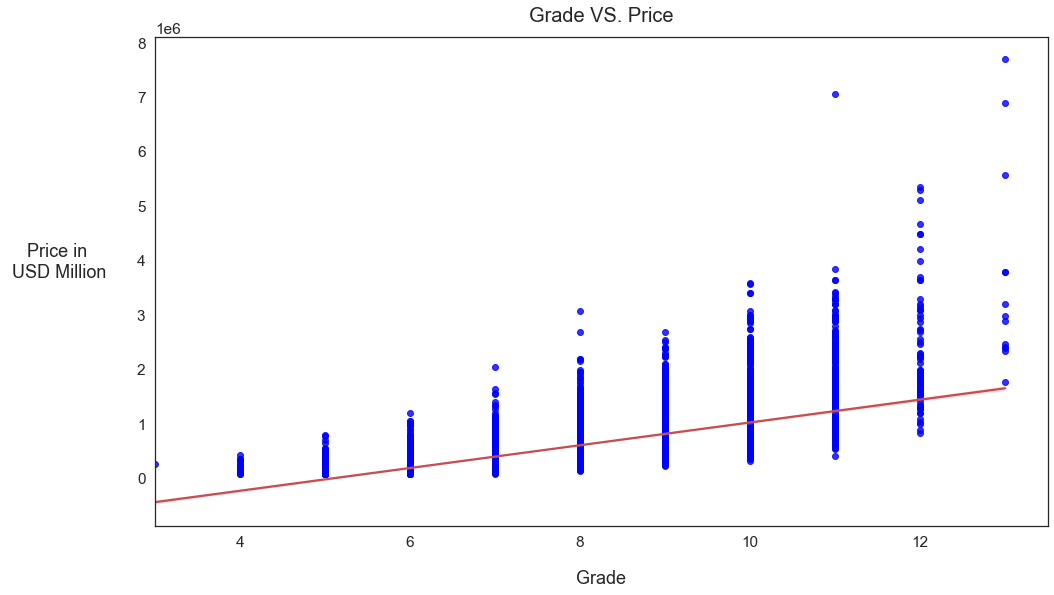

In [33]:
sns.set_style("white")
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
sns.set(font_scale=1.4)
sns.regplot( 
        x=df['grade'],
        y=df['price'],
        ci=99,
        scatter_kws={"color": "blue"}, line_kws={"color": "r"}
    )
ax.set(xlim=(3, 13.5))
ax.set_xlabel("Grade", fontsize=18, labelpad=20)
ax.set_ylabel("Price in\n USD Million", fontsize=18, labelpad=80, rotation=0)
ax.set_title("Grade VS. Price", fontsize=20, pad=15);
 

#plt.savefig('price_vs_grade.png', dpi=100, bbox_inches='tight')

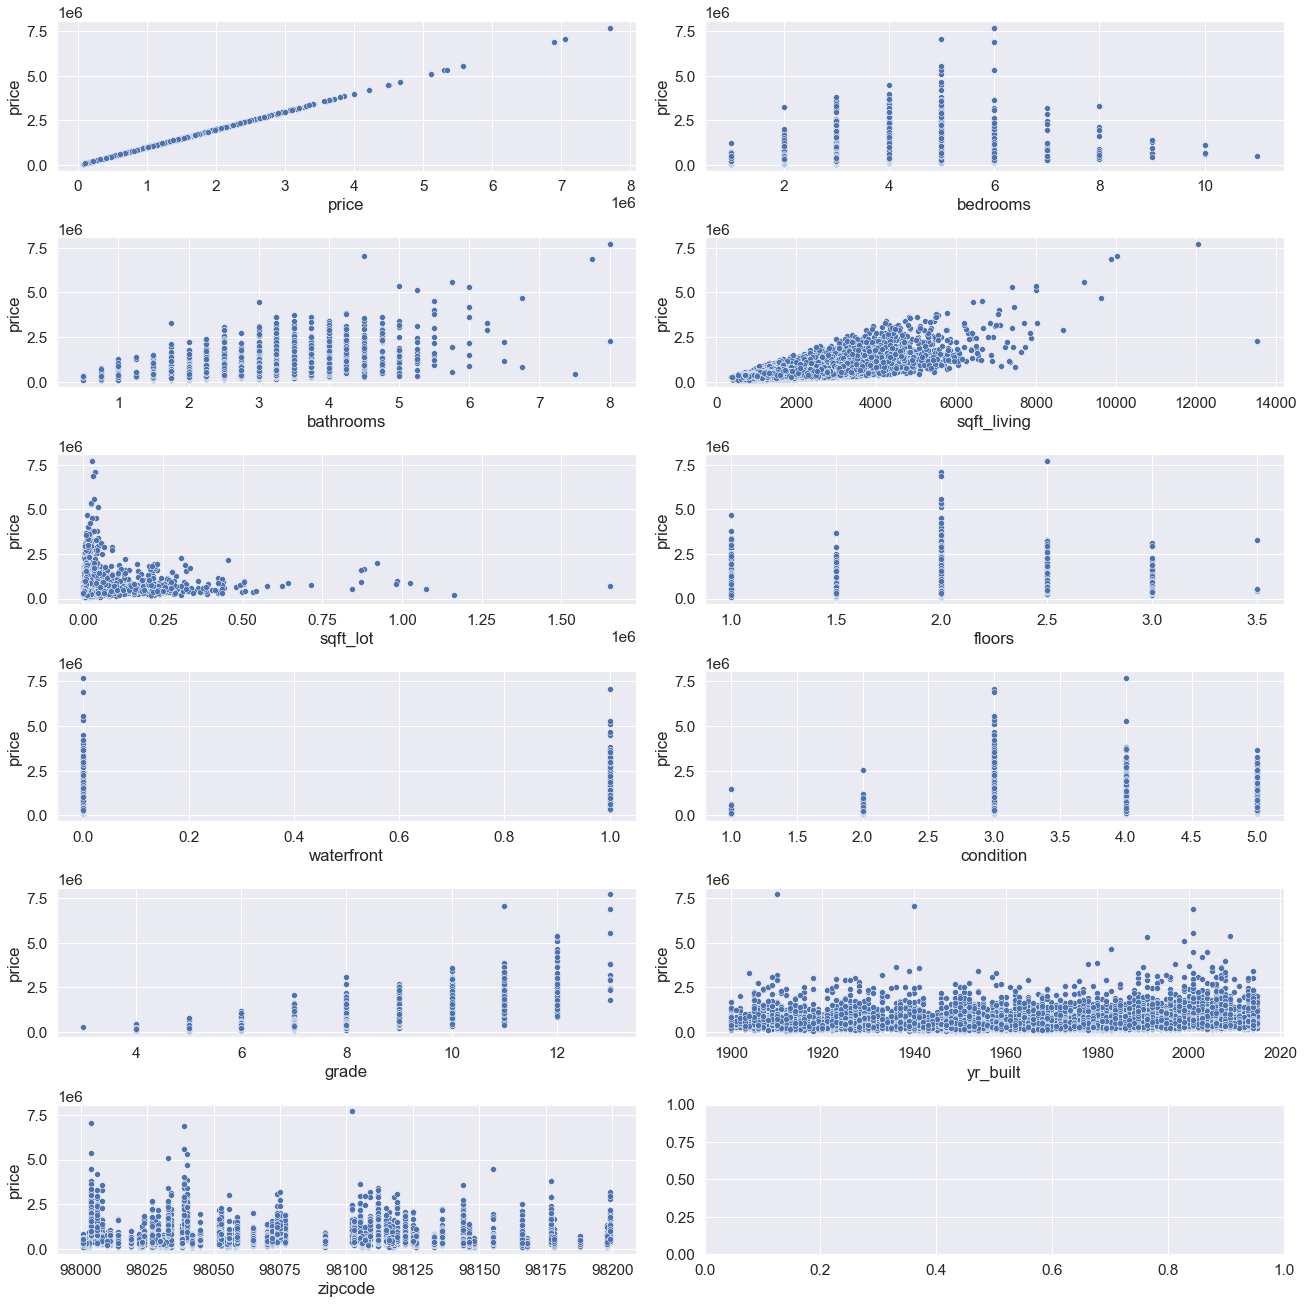

In [34]:
f, axes = plt.subplots(nrows=6, ncols=2, figsize=(18,18) ,constrained_layout=True)

for axx, column in zip(axes.flatten(), df.columns):
    sns.set_style("white")
    sns.scatterplot(x=df[column], y= df['price'], data=df,ax=axx) 

> checking for linear relationship with price <br />
> sqrt_living with the highest correlation coefficient looks the most linear same with grade <br />
> excluding condition since it doesn't have a clear correlation with price 

In [40]:
cd Images

/Users/miafryer/Documents/flatiron/project2/project2group5/Images


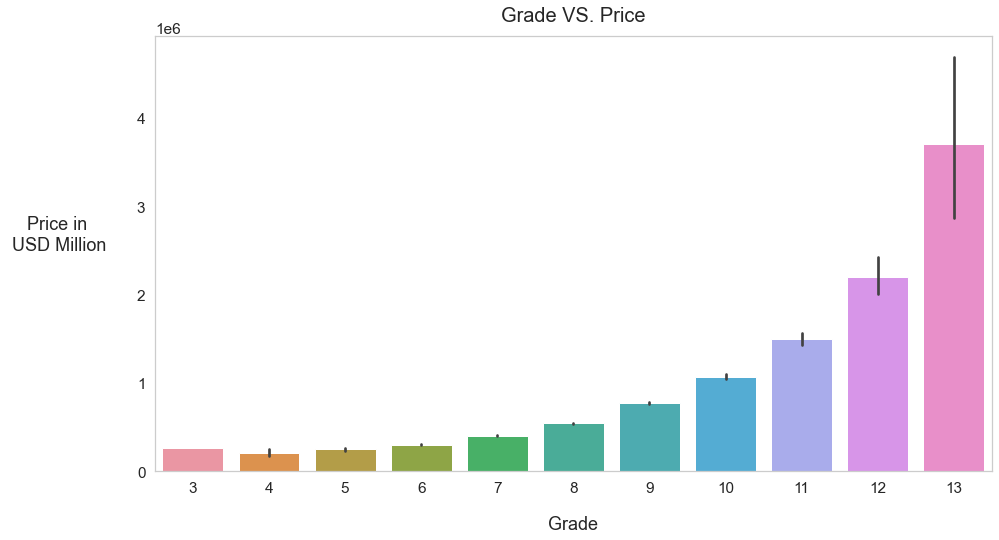

In [41]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x=df['grade'],y=df['price'], data=df)

ax.set_xlabel("Grade", fontsize=18, labelpad=20)
ax.set_ylabel("Price in\n USD Million", fontsize=18, labelpad=80, rotation=0)
ax.set_title("Grade VS. Price", fontsize=20, pad=15);

#plt.savefig('price_vs_grade.png', dpi=100, bbox_inches='tight')

In [36]:
bins = [370,1370,2370,3370,4370,5370,6370,7370,8370,9370,10370]
labels = [1,2,3,4,5,6,7,8,9,10]
df['sqft_living_binned'] = pd.cut(df['sqft_living'], bins,labels=labels, include_lowest = True)

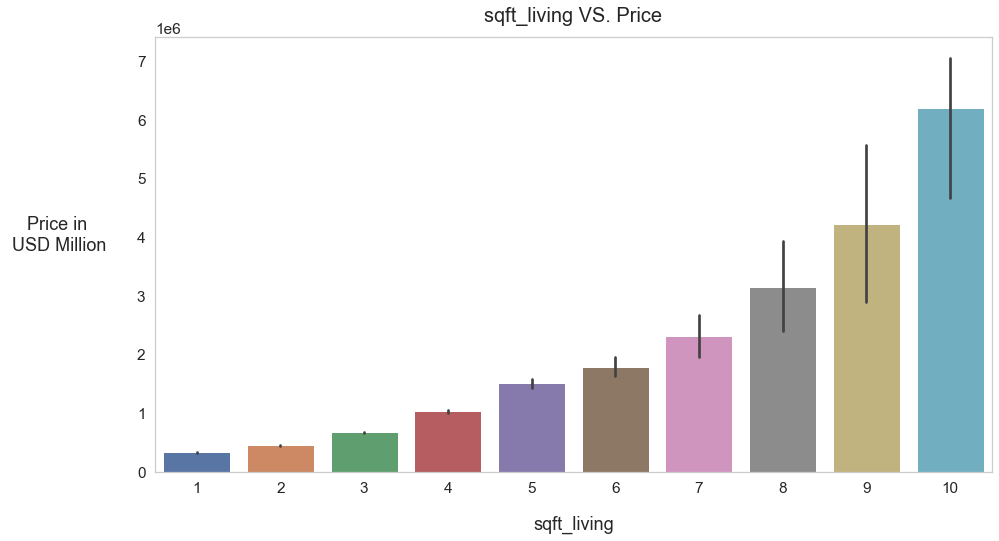

In [42]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x=df['sqft_living_binned'],y=df['price'], data=df)

ax.set_xlabel("sqft_living", fontsize=18, labelpad=20)
ax.set_ylabel("Price in\n USD Million", fontsize=18, labelpad=80, rotation=0)
ax.set_title("sqft_living VS. Price", fontsize=20, pad=15);

#plt.savefig('sqft_living_vs_grade.png', dpi=100, bbox_inches='tight')

In [39]:
top_zip= df.groupby(['zipcode'])['price'].mean().sort_values(ascending= False).head(10)
df_top_zip.reset_index= pd.DataFrame(top_zip, columns =['zipcode', 'price'])
df_top_zip

#fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("whitegrid", {'axes.grid' : False})
#sns.barplot(x=df_top_zip.index,y=df_top_zip['price'], data=df_top_zip. order=df_top_zip.sort_values('price').)

#ax.set_xlabel("zipcode", fontsize=18, labelpad=20)
#ax.set_ylabel("Price in\n USD Million", fontsize=18, labelpad=80, rotation=0)
#ax.set_title("Top Zipcode VS. Price", fontsize=20, pad=15);



NameError: name 'df_top_zip' is not defined

# Data Preparation

In [ ]:
df.waterfront.fillna(value=0, inplace = True)

In [ ]:
df.isna().sum()

In [ ]:
x=df.drop('price', axis=1).copy()
y=df['price']

In [ ]:
#spliting data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

In [ ]:
x_train.isna().sum()

In [ ]:
#pd.set_option("display.max_rows", 66, "display.max_columns", 66)

train= pd.concat([x_train, y_train], axis =1)
corr= train.corr()
df=corr.abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[abs(df['cc'] > 0.6)]

In [ ]:
#testing for VIF
vif = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
pd.Series(vif, index=x_train.columns, name="Variance Inflation Factor")            

> dropping bathrooms to eliminate multicollinearity since it is correlated with sqft_living and <br /> grade when those two are correlated with price, bathroom also has a high VIF

In [ ]:
#seperating two types of predictors 
categorical=['bedrooms','floors','waterfront', 'grade', 'zipcode']
con = ['sqft_living','sqft_lot']

In [ ]:
#creating dummie variables for categorical data
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(x_train[categorical])
dummies_encoded_train_all = ohe.transform(x_train[categorical])
dummies_encoded_train_all = pd.DataFrame(dummies_encoded_train_all, columns=ohe.get_feature_names(categorical), index=x_train.index)


In [ ]:
#transforming test dummies
dummies_encoded_test_all= ohe.transform(x_test[categorical])
dummies_encoded_test_all = pd.DataFrame(dummies_encoded_test_all, columns=ohe.get_feature_names(categorical),index=x_test.index )

In [ ]:
x_test['log_sqft_lot']= np.log(x_test['sqft_lot'])
x_train['log_sqft_lot']= np.log(x_train['sqft_lot'])


In [ ]:
x_train_final = pd.concat([x_train[['sqft_living','log_sqft_lot']],dummies_encoded_train_all], axis=1)
x_train_final.columns=[x.replace('.','_') for x in x_train_final.columns]

In [ ]:
x_test_final = pd.concat([x_test[['sqft_living','log_sqft_lot']],dummies_encoded_test_all], axis=1)
x_test_final.columns=[x.replace('.','_') for x in x_test_final.columns]

In [ ]:
train_final= pd.concat([x_train_final,y_train], axis=1)

# Data Modeling

In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train, y_train)
DummyRegressor()
dummy_regr.predict(x_train)
dummy_regr.score(x_train, y_train)

## Baseline Model sqft_living vs price

In [ ]:
baseline_model = LinearRegression()
baseline_model.fit(x_train[['sqft_living']], y_train)
baseline_model.score(x_train[['sqft_living']], y_train)


In [ ]:
baseline_model.score(x_test[['sqft_living']], y_test)

In [ ]:
cross_val_score(baseline_model, x_train[['sqft_living']],y_train, cv=5).mean()

In [ ]:
#root mean squared error
train_mse= mean_squared_error(y_train, baseline_model.predict(x_train[['sqft_living']]), squared=False)
test_mse= mean_squared_error(y_test, baseline_model.predict(x_test[['sqft_living']]), squared=False)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

In [ ]:
#overfitting if large difference between to test and train mse 
abs(train_mse-test_mse)/train_mse

In [ ]:
y_hat_train = baseline_model.predict(x_train[['sqft_living']])
y_hat_test = baseline_model.predict(x_test[['sqft_living']])
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

print('Average Train Residuals/Bias:', train_residuals.mean())
print('Average Test Residuals/Bias:', test_residuals.mean())

In [ ]:
var_train = np.var(y_hat_train) 
var_test = np.var(y_hat_test) 
print('Train Prediciton Variance:', var_train)
print('Test Prediciton Variance:', var_test)

In [ ]:
#check if i get the same result with a different model 
outcome = 'price'
predictors ='sqft_living'
formula = outcome + '~' + predictors
model2 = ols(formula=formula, data=train_final).fit()
model2.summary()


In [ ]:
fig, axes = plt.subplots(figsize=(15,12))
fig = sm.graphics.plot_regress_exog(model2, 'sqft_living', fig=fig)

In [ ]:
residuals = model2.resid

In [ ]:
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

> Our outliers are causing problems. This
is bad enough that we can probably say that we
are violating the normality assumption

In [ ]:
pred_train = model2.predict(x_train['sqft_living'])
fig, ax = plt.subplots()
ax= sns.regplot(x=pred_train, y=model2.resid, scatter_kws={"color": "blue"}, line_kws={"color": "r"})
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");


> heteroscedasticity

In [ ]:
#vertical distance between the points and the line denote the errors

fig, ax = plt.subplots(figsize=(10, 8))
ax= sns.regplot(x=y_train, y=pred_train, scatter_kws={"color": "blue"}, line_kws={"color": "r"})
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title('Base Model: Predicted price vs Actual price');

#plt.savefig('train_base_model.png', dpi=100, bbox_inches='tight')


In [ ]:
#vertical distance between the points and the line denote the errors
pred_test = model2.predict(x_test['sqft_living'])
fig, ax = plt.subplots()
ax= sns.regplot(x=y_test, y=pred_test, scatter_kws={"color": "blue"}, line_kws={"color": "r"})
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title('Predicted price vs Actual price')


### standardized transformed sqft_living vs price

> We have some outliers that are all over the
place violating linear relationship

In [ ]:
scaler = StandardScaler()
x_train_sc1 = scaler.fit_transform(x_train[['sqft_living']])
x_test_sc1 = scaler.fit_transform(x_test[['sqft_living']])

In [ ]:
linreg1_t = LinearRegression()
linreg1_t.fit(x_train_sc1, y_train)
linreg1_t.score(x_train_sc1, y_train)


> standardscaler doesn't seem to make a difference here

### polynomial transformed sqft_living vs price

In [ ]:
colors = ['yellow', 'lightgreen', 'blue']
plt.figure(figsize=(10, 6))
plt.scatter(x['sqft_living'], y, color='green', s=50, marker='.', label='plot points')

for index, degree in enumerate([2, 3, 4]):
    
    poly = PolynomialFeatures(degree)
    
    x_poly_train = poly.fit_transform(x_train[['sqft_living']])
    
    reg_poly = LinearRegression().fit(x_poly_train, y_train)
    
    x_poly_test = poly.transform(x_test[['sqft_living']])
     
    y_pred = reg_poly.predict(x_poly_test)
    
    print("degree %d" % degree, r2_score(y_test, y_pred))
    
    x_poly = poly.transform(x[['sqft_living']])
     
    y_poly = reg_poly.predict(x_poly)
    
    plt.plot(x['sqft_living'], y_poly, color = colors[index], linewidth=2, label='degree %d' % degree)
    

> polynomial seems to improve the model 


## 2. Build the Second Model with Additional Feature (Grade)

We will add in additional feature of the training data, and compare that model's performance to the performance of the baseline model.


### including a categorical variable grade 

In [ ]:
linreg2 = LinearRegression()
linreg2.fit(x_train[['sqft_living','grade']], y_train)
linreg2.score(x_train[['sqft_living', 'grade']], y_train)

### standaziing the two independent varaibles 

In [ ]:
scaler = StandardScaler()
x_train_sc2 = scaler.fit_transform(x_train[['sqft_living','grade']])


In [ ]:
linreg2_t = LinearRegression()
linreg2_t.fit(x_train_sc2, y_train)
linreg2_t.score(x_train_sc2, y_train)

### turning grade into dummies and combining it with standardized sqft_living

In [ ]:

ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
ohe.fit(x_train[['grade']])
dummies_encoded_train = ohe.transform(x_train[['grade']])
dummies_encoded_test = ohe.transform(x_test[['grade']])
dummies_encoded_train = pd.DataFrame(dummies_encoded_train, columns = ohe.get_feature_names(['grade']), index=x_train.index)
dummies_encoded_test = pd.DataFrame(dummies_encoded_test, columns = ohe.get_feature_names(['grade']), index=x_test.index)


In [ ]:
x_train_living = pd.DataFrame(x_train_sc1, index=x_train.index)
x_test_living = pd.DataFrame(x_test_sc1, index=x_test.index)

In [ ]:
x_train2 = pd.concat([x_train_living, dummies_encoded_train], axis=1)
#x_test2 = pd.concat([x_test_living, dummies_encoded_test], axis=1)

In [ ]:
linreg2_t = LinearRegression()
linreg2_t.fit(x_train2, y_train)
linreg2_t.score(x_train2, y_train)

### dummies plus polynomial transformation 

In [ ]:
poly = PolynomialFeatures(2)
    
x_poly_train = poly.fit_transform(x_train[['sqft_living']])
    
x_poly_test = poly.transform(x_test[['sqft_living']])
     
x_train_poly = pd.DataFrame(x_poly_train, index=x_train.index)
x_test_poly = pd.DataFrame(x_poly_test, index=x_test.index)
    
x_train3 = pd.concat([x_train_poly, dummies_encoded_train], axis=1)
x_test3 = pd.concat([x_test_poly, dummies_encoded_test], axis=1)


reg_poly = LinearRegression().fit(x_train3, y_train)
y_pred = reg_poly.predict(x_test3)
    
print("degree %d" % 2, r2_score(y_test, y_pred))
    

### conclusion: dummies and polynomial transformation has more positive effect on the model

## 3. Build and Evaluate a Final Predictive Model

Using the best features selected in the previous step, create a final model, fit it on all rows of the training dataset, and evaluate it on all rows of the test dataset in terms of both r-squared and RMSE.


### Creating the final predictive model with all the independent variables selected 

In [ ]:
model_all = LinearRegression()
model_all.fit(x_train_final, y_train)
cross_val_score(model_all, x_train_final, y_train, cv=5)


In [ ]:
model_all.score(x_test_final, y_test)

In [ ]:
outcome = 'price'
predictors = x_train_final
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_all2= ols(formula=formula, data=train_final).fit()
model_all2.summary()


In [ ]:
fig, axes = plt.subplots(figsize=(15,12))
fig = sm.graphics.plot_regress_exog(model_all2,'sqft_living', fig=fig)

In [ ]:
fig, axes = plt.subplots(figsize=(15,12))
fig = sm.graphics.plot_regress_exog(model_all2,'log_sqft_lot', fig=fig)

### selecting only the ones that are statistically significant 

In [ ]:
summary = model_all2.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)

In [ ]:
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_all3 = ols(formula=formula, data=train_final).fit()
model_all3.summary()

### Removing the insignificant variables did not improve adjusted R-squared

In [ ]:
#plot the features with the highest coefficients 
sns.set_style("whitegrid", {'axes.grid' : False})
model_coef = model_all3.params.sort_values(ascending=False).head(11)

model_largest2 =pd.DataFrame(model_coef, columns =['coefficient'])
model_largest2.drop('Intercept', axis=0, inplace= True)
plt.figure(figsize = (8,8))
a= sns.barplot(data=model_largest2, x=model_largest2.index, y= 'coefficient', palette="flare")
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient', size=20)
plt.title('Top 10 Features', size=20);
plt.xticks(rotation=20)

#plt.savefig('coefficent.png', dpi=100, bbox_inches='tight')


### Applying the feature selection tool 

In [ ]:
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
testmodel = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(testmodel, cv=splitter)
selector.fit(x_train_final,y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(x_train_final.columns):
    print(f"{col}: {selector.support_[index]}")

In [ ]:
#running a regression of the columns selected by feature se
linreg = LinearRegression()
selected_columns = x_train_final.columns[selector.support_]
linreg.fit(x_train_final[selected_columns],y_train)
estimators = selector.estimator_
print(estimators.score(x_train_final[selected_columns],y_train))


### Same result 

### Applying Polynomial transformation on the final test data set

In [ ]:
poly = PolynomialFeatures(3)

x_poly_train_final = poly.fit_transform(x_train_final[['sqft_living','log_sqft_lot']])
    
x_poly_test_final = poly.transform(x_test_final[['sqft_living','log_sqft_lot']])
     
x_train_poly_final = pd.DataFrame(x_poly_train_final, index=x_train_final.index)
x_test_poly_final = pd.DataFrame(x_poly_test_final, index=x_test_final.index)
    
x_train_final_model = pd.concat([x_train_poly_final, dummies_encoded_train_all], axis=1)
x_test_final_model = pd.concat([x_test_poly_final, dummies_encoded_test_all], axis=1)

reg_poly_final = LinearRegression().fit(x_train_final_model, y_train)

y_pred_train_final = reg_poly_final.predict(x_train_final_model)
y_pred_test_final = reg_poly_final.predict(x_test_final_model)

print("degree %d" % 3, r2_score(y_train, y_pred_train_final))
print("degree %d" % 3, r2_score(y_test, y_pred_test_final))

In [ ]:
reg_poly_final.intercept_

In [ ]:
coef_dict={}

for column_name, coefficient in zip(x_train_final_model.columns, reg_poly_final.coef_):
    coef_dict[column_name]= coefficient
sorted(coef_dict.items(), key=lambda x: x[1], reverse=True)


## 4. Interpret the Final Model


> According to our model, the base price for the King's county housing price is (the
model intercept) <br /> is about $-6749244. Without any attributes, the house will not be worth anything. However, considering the right zipcode, higher grade, <br /> bigger footage of the home and including a waterfront will increase the price by the highest amount. 

In [ ]:
train_mse_final= mean_squared_error(y_train, y_pred_train_final, squared=False)
test_mse_final= mean_squared_error(y_test, y_pred_test_final, squared=False)

print('Train Mean Squarred Error:', train_mse_final)
print('Test Mean Squarred Error:', test_mse_final)

> This means that for an average housing price, this algorithm will
> be off by about $151,476.5 given the average housing price for the data set is \\$540,296.6, 
our model still has room for improvement. 


In [ ]:
abs(train_mse_final-test_mse_final)/train_mse_final

> overfitting if large difference between to test and train mse and our model is not overfitting 

In [ ]:
train_residuals_final = y_pred_train_final - y_train
test_residuals_final = y_pred_test_final - y_test

print('Average Train Residuals/Bias:', train_residuals_final.mean())
print('Average Test Residuals/Bias:', test_residuals_final.mean())

In [ ]:
var_train_final = np.var(y_pred_train_final) 
var_test_final = np.var(y_pred_test_final) 
print('Train Prediciton Variance:', var_train_final)
print('Test Prediciton Variance:', var_test_final)

In [ ]:
cross_val_score(reg_poly_final, x_train_final_model, y_train, cv=5).mean()

In [ ]:
#vertical distance between the points and the line denote the errors

fig, ax = plt.subplots(figsize=(10, 8))
ax= sns.regplot(x=y_train, y=y_pred_train_final, scatter_kws={"color": "blue"}, line_kws={"color": "r"})
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")

ax.set_title('Final Model: Predicted price vs Actual price');


#plt.savefig('train_final_model.png', dpi=100, bbox_inches='tight')

In [ ]:
#vertical distance between the points and the line denote the errors

fig, ax = plt.subplots()
ax= sns.regplot(x=y_test, y=y_pred_test_final, scatter_kws={"color": "blue"}, line_kws={"color": "r"})
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title('Predicted price vs Actual price')


> the final model shows that We have some outliers but overall it looks like we have
a linear relationship

In [ ]:
fig = sm.graphics.qqplot(test_residuals_final, dist=stats.norm, line='45', fit=True)

>  due to all the outliers, we are violating the normality assumption


In [ ]:
fig, ax = plt.subplots()
ax= sns.regplot(x=y_pred_test_final, y=test_residuals_final, scatter_kws={"color": "blue"}, line_kws={"color": "r"})
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");


> This is not the worst "funnel" shape, but the residuals still aren't different enough based on the predicted price to say we have a strict homoscedasticity.


# Evaluation
>Evaluate how well your work solves the stated business problem.
>Questions to consider:
>How do you interpret the results?
>How well does your model fit your data? How much better is this than your baseline model?
>How confident are you that your results would generalize beyond the data you have?
>How confident are you that this model would benefit the business if put into use?

# Conclusions
>Provide your conclusions about the work you've done, including any limitations or next steps.
>Questions to consider:
>What would you recommend the business do as a result of this work?
>What are some reasons why your analysis might not fully solve the business problem?
>What else could you do in the future to improve this project?
